In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import convolve2d

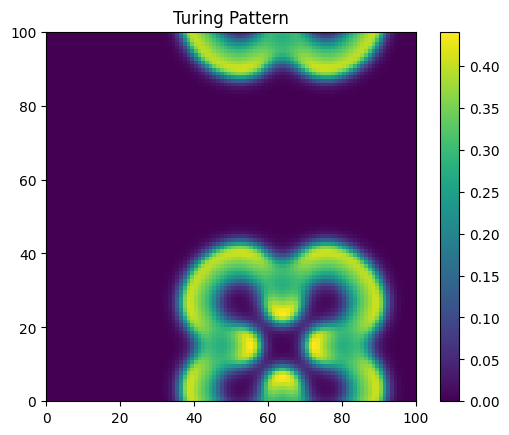

In [2]:
# Parameters
D_a = 1.1  # Diffusion rate of chemical A
D_b = 0.5  # Diffusion rate of chemical B
feed_rate = 0.0545
kill_rate = 0.062

# Grid dimensions and initialization
size = 100
dx = 0.8
dt = 0.1
steps = 10000

# A = np.random.random((size, size)).astype(int)
A = np.ones((size, size))
B = np.zeros((size, size))

# Initialize B with a small region of random noise
rand_x, rand_y = np.random.randint(0, size, 2)
B[rand_x - 5:rand_x + 5, rand_y - 5:rand_y + 5] = 1.0

# Create a convolution kernel for spatial operations
kernel = np.array([[0.05, 0.2, 0.05],
                   [0.2, -1, 0.2],
                   [0.05, 0.2, 0.05]])

for _ in range(steps):
    # Calculate Laplacians
    A_lap = convolve2d(A, kernel, mode='same', boundary='wrap')
    B_lap = convolve2d(B, kernel, mode='same', boundary='wrap')
    
    # Reaction-diffusion equations
    A_new = A + (D_a * A_lap - A * B * B + feed_rate * (1 - A)) * dt
    B_new = B + (D_b * B_lap + A * B * B - (kill_rate + feed_rate) * B) * dt
    
    A, B = A_new, B_new

# Display the Turing pattern
plt.imshow(B, cmap='viridis', extent=[0, size, 0, size])
plt.colorbar()
plt.title("Turing Pattern")
plt.show()


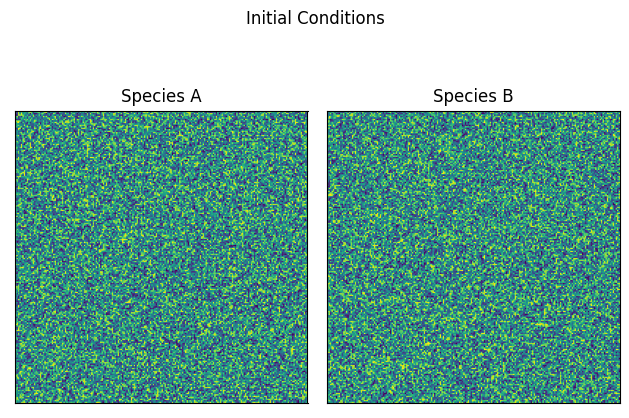

(200, 200)


In [17]:
# Parameters
D_a = 1.1  # Diffusion rate of chemical A
D_b = 0.4  # Diffusion rate of chemical B
# f = 0.0545 # feeding rate
# k = 0.062 # killing rate

f = 0.05 # feeding rate
k = 0.05 # killing rate


# Grid dimensions and initialization
size = 200
# dx = 0.01
# dt = 0.01
dx = 0.1
dt = 0.1
steps = 1000


""" INITIAL conditions """
# A_init = np.ones((size, size)) # concentration of species A
A_init = np.random.random((size, size))
B_init = np.random.random((size, size))
# B_init = np.zeros((size, size)) # concentration of species B

# # Initialize B with a small region of random noise
# B_init[10:20, 30:90] = 1.0
# B_init[80:85, 10:90] = 5.0

figs, axs = plt.subplots(1, 2)

axs[0].imshow(A_init)

axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_title("Species A")

axs[1].imshow(B_init)

axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].set_title("Species B")

plt.suptitle("Initial Conditions")
plt.tight_layout()
plt.show()


# Create a convolution kernel for spatial operations
kernel = np.array([[0.05, 0.2, 0.05],
                   [0.2, -1, 0.2],
                   [0.05, 0.2, 0.05]])

A = A_init
B = B_init

A_history = []
B_history = []

for _ in range(steps):
    # Calculate Laplacians
    A_lap = convolve2d(A, kernel, mode='same', boundary='wrap')
    B_lap = convolve2d(B, kernel, mode='same', boundary='wrap')

    print(A_lap.shape)

    break

#     reaction = A * 2 * B
#     # reaction = A * B * B
#     # reaction = A * B * B

#     # Reaction-diffusion equations
#     A_new = A + (D_a * A_lap - reaction) * dt
#     B_new = B + (D_b * B_lap + reaction) * dt

#     # # Reaction-diffusion equations
#     # A_new = A + (D_a * A_lap - reaction + f * (1 - A)) * dt
#     # B_new = B + (D_b * B_lap + reaction - (k + f) * B) * dt

#     A, B = A_new, B_new

#     A_history.append(A)
#     B_history.append(B)
    

    

# figs, axs = plt.subplots(1, 2)

# axs[0].imshow(A)

# axs[0].set_yticks([])
# axs[0].set_xticks([])
# axs[0].set_title("Species A")

# axs[1].imshow(B)

# axs[1].set_yticks([])
# axs[1].set_xticks([])
# axs[1].set_title("Species B")

# plt.suptitle("Final Conditions")
# plt.tight_layout()
# plt.show()

In [ ]:
break

In [4]:
res = []

for i, A in enumerate(A_history):
    eA, _ = np.linalg.eigh(A)

    row = {
        'max' : np.max(eA),
        'min' : np.min(eA),
        'mean' : np.mean(eA),
        'median' : np.median(eA),
        'max-median' : np.max(eA) / np.median(eA),
        't' : i,
    }

    res.append(row)
    # break


res = pd.DataFrame(res)
res.head()

,max,min,mean,median,max-median,t
0,50.363309,-5.418663,0.507924,0.059912,840.619136,0
1,50.219823,-5.324879,0.505958,0.058029,865.430847,1
2,50.076123,-5.234549,0.504004,0.056196,891.093291,2
3,49.932226,-5.147515,0.502059,0.054422,917.503642,3
4,49.788146,-5.063588,0.500125,0.052712,944.528565,4


<AxesSubplot: xlabel='t', ylabel='max-median'>

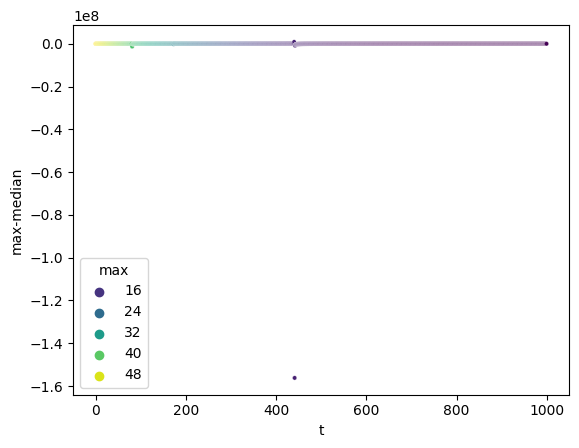

In [5]:
sns.scatterplot(data=res, 
                x='t',
                y='max-median',
                s=10,
                hue='max',
                palette='viridis')